In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

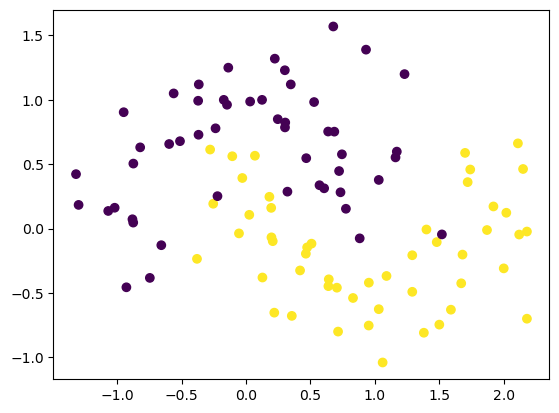

In [3]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [4]:
X = df.iloc[:,0:2].values
Y = df.iloc[:,-1].values

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.get_weights()

[array([[ 0.4709854 ,  1.4046133 ,  0.64784575,  0.11486675,  0.29233867,
         -0.07345163, -1.5651898 , -0.32770723, -1.6817017 ,  1.7442629 ],
        [-1.121772  ,  1.0958829 ,  0.34597766,  0.16580069,  1.4485862 ,
         -0.05332587,  0.04426897, -0.7886021 ,  1.6616246 , -1.341069  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 7.04074144e-01,  8.28508437e-01, -4.99274492e-01,
         -9.55830634e-01,  7.74363041e-01,  5.33312187e-02,
         -5.73788762e-01,  4.96393770e-01,  7.31871575e-02,
          4.55843419e-01],
        [-1.53202593e-01, -5.87561317e-02,  8.49613249e-01,
         -4.83904146e-02,  7.42467344e-02, -3.49248201e-01,
          1.29734963e-01, -1.17655031e-01,  1.80588484e-01,
          1.15173124e-01],
        [ 1.00936699e+00,  7.29701966e-02,  7.41020203e-01,
         -4.22376066e-01,  3.06791961e-01, -4.73890066e-01,
          6.77051365e-01, -3.71356934e-01, -7.41734505e-01,
         -3.3914932

In [8]:
initial_weights = model.get_weights()

In [9]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [10]:
model.set_weights(initial_weights)

In [11]:
model.get_weights()

[array([[ 1.8536402 , -0.8841565 ,  0.84083706, -0.85853845, -0.603892  ,
          0.15128139, -0.04853393,  0.7753125 , -0.31812838, -1.3609622 ],
        [-0.71191424, -1.033463  ,  0.08186498, -0.7073798 , -0.7692841 ,
          0.33894086,  0.114395  ,  0.35034513,  0.09615378,  1.011075  ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.55928701e-01,  6.09427392e-01, -3.93158555e-01,
         -2.55041122e-01, -5.00574827e-01, -5.83376050e-01,
         -1.35795385e-01,  2.67616361e-01,  4.27933000e-02,
         -4.22585011e-01],
        [-2.96805352e-01,  1.77674189e-01,  6.03645563e-01,
         -5.89584529e-01, -4.54136014e-01, -2.47824430e-01,
          1.61188841e-01,  5.45137599e-02, -3.17934245e-01,
         -4.63620663e-01],
        [-1.38371930e-01,  3.75752985e-01, -2.89895356e-01,
          1.55409411e-01, -3.40031743e-01, -5.19996043e-04,
          3.77233475e-02, -3.16185020e-02,  7.45172985e-03,
          3.6870074

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 72ms/step - loss: 0.7002 - accuracy: 0.2250 - val_loss: 0.6969 - val_accuracy: 0.3500
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6948 - accuracy: 0.4375 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.4875 - val_loss: 0.6863 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6847 - accuracy: 0.5250 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6810 - accuracy: 0.5250 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6777 - accuracy: 0.5000 - val_loss: 0.6746 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.6742 - accuracy: 0.5375 - val_loss: 0.6710 - val_accuracy: 0.5500
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 15ms/step - loss: 0.3903 - accuracy: 0.8750 - val_loss: 0.3451 - val_accuracy: 0.9000
Epoch 60/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3853 - accuracy: 0.8750 - val_loss: 0.3375 - val_accuracy: 0.9000
Epoch 61/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3796 - accuracy: 0.8750 - val_loss: 0.3293 - val_accuracy: 0.9000
Epoch 62/100
3/3 [==============================] - 0s 13ms/step - loss: 0.3745 - accuracy: 0.8750 - val_loss: 0.3217 - val_accuracy: 0.9000
Epoch 63/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3697 - accuracy: 0.8750 - val_loss: 0.3125 - val_accuracy: 0.9000
Epoch 64/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3654 - accuracy: 0.8750 - val_loss: 0.3030 - val_accuracy: 0.9000
Epoch 65/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3612 - accuracy: 0.8750 - val_loss: 0.2934 - val_accuracy: 0.9000
Epoch 66/100
3/3 [========

In [15]:
model.get_weights()

[array([[ 1.9740047 , -0.53552246,  1.0509204 , -0.99473816, -0.41259316,
          0.13818245,  0.02616488,  0.67890126, -0.66422355, -1.6389364 ],
        [-0.9234827 , -1.3011309 , -0.03442108, -0.58510435, -0.9806043 ,
          0.6050187 ,  0.3756909 ,  0.52886325,  0.21651652,  0.9597784 ]],
       dtype=float32),
 array([ 0.03455123,  0.25507218,  0.23507576, -0.13473877,  0.31832987,
         0.11367435,  0.10182844,  0.00608324,  0.02727923, -0.08913264],
       dtype=float32),
 array([[ 1.75853431e-01,  7.81752765e-01, -4.08050746e-01,
         -1.90391585e-01, -4.28068608e-01, -5.83376050e-01,
         -1.35795385e-01,  3.05279106e-01, -2.96971910e-02,
         -3.66939187e-01],
        [-7.14038759e-02,  3.64309579e-01,  5.61855078e-01,
         -5.84401965e-01, -2.26080254e-01, -2.47824430e-01,
          1.61188841e-01,  9.06398073e-02, -3.62705171e-01,
         -7.29109824e-01],
        [-1.14318110e-01,  5.27751207e-01, -3.88707548e-01,
          3.01933020e-01, -2.95542

9600/9600 [==============================] - 7s 672us/step


<AxesSubplot:>

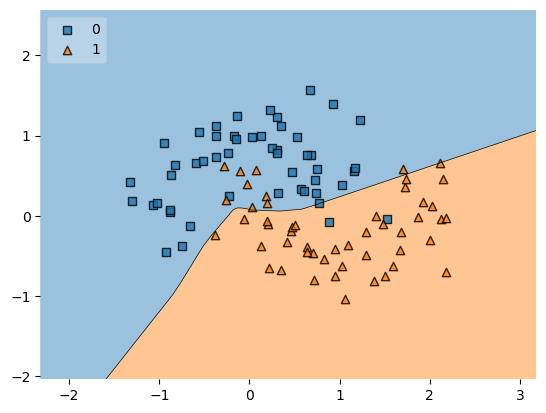

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [17]:
(np.random.randn(10,10)*0.01).min()

-0.033491106639200185

In [18]:
(np.random.randn(10,10)*0.01).max()

0.022909688533543783